# Analysis of these reprogramming Recepies

# Day 1: Geneforme embedding analysis

In [1]:
import numpy as np
import anndata as ad
import pandas as pd
import scanpy as sc
import os

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform

## Load and organize data

In [2]:
datapath = '/nfs/turbo/umms-indikar/shared/projects/DARPA_AI/in-silico-reprogramming/one-shot/geneformer'

# Organize all perturbed embedding files
h5ad_files = [f for f in os.listdir(datapath) if f.endswith('.h5ad')]
print(f"List of .h5ad files: {h5ad_files}")

adata_perturbed = {}
for file in h5ad_files:
    adata_perturbed[file] = sc.read_h5ad(os.path.join(datapath, file))
    print(f"{file}:")

# Load unperturbed embedding file
fibroblast_file = os.path.join(datapath, 'fibroblast.h5ad')
adata_fibroblast = sc.read_h5ad(fibroblast_file)


List of .h5ad files: ['POU3F2_SOX2_BACH1_AR_PBX1_NANOG.h5ad', 'PDX1_PAX4_MAFA.h5ad', 'ETV2.h5ad', 'PPARG.h5ad', 'NEUROG2_SOX11_ISL1_LHX3.h5ad', 'HNF4A_FOXA3_GATA6_CDX2.h5ad', 'SOX18.h5ad', 'NFKB1_LEF1.h5ad', 'MYOCD.h5ad', 'MYOCD_GATA6_MEF2C.h5ad', 'EMX2_HNF1B_HNF4A_PAX8.h5ad', 'GATA4_MEF2C_TBX5_ESRRG_MESP1_ZFPM2_MYOCD.h5ad', 'SOX2.h5ad', 'ATF5_PROX1_FOXA2_FOXA3_HNF4A.h5ad', 'MYOD1_MYCL.h5ad', 'MSI1_NEUROG2_MBD2.h5ad', 'GATA4_MEF2C_TBX5_MESP1_MYOCD.h5ad', 'SOX2_HMGA2.h5ad', 'SPI1_IRF8_BATF3.h5ad', 'fibroblast.h5ad', 'ASCL1_PAX6.h5ad', 'NFE2_MAFG_MAFK.h5ad', 'PRDM16_CEBPB.h5ad', 'SOX2_ASCL1_NEUROG2.h5ad', 'MITF_SOX10_PAX3.h5ad', 'CRX_RAX_NEUROD1.h5ad', 'MYC_KLF4_SOX9.h5ad', 'SOX2_PAX6.h5ad', 'AR_SOX2_SMAD3_MYC_JUN_WT1_TAL1_SPI1_RUNX1.h5ad', 'CRX_RAX_OTX2_NEUROD1.h5ad', 'PTF1A.h5ad', 'SNAI2_EYA1_SIX1.h5ad', 'FOXM1_SOX2_MYC_SALL4_STAT6.h5ad', 'ASCL1_SOX2.h5ad', 'ASCL1_POU3F2_MYT1L_LMX1A_FOXA2.h5ad']


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


POU3F2_SOX2_BACH1_AR_PBX1_NANOG.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


PDX1_PAX4_MAFA.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ETV2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


PPARG.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NEUROG2_SOX11_ISL1_LHX3.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


HNF4A_FOXA3_GATA6_CDX2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SOX18.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NFKB1_LEF1.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MYOCD.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MYOCD_GATA6_MEF2C.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


EMX2_HNF1B_HNF4A_PAX8.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


GATA4_MEF2C_TBX5_ESRRG_MESP1_ZFPM2_MYOCD.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SOX2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ATF5_PROX1_FOXA2_FOXA3_HNF4A.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MYOD1_MYCL.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MSI1_NEUROG2_MBD2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


GATA4_MEF2C_TBX5_MESP1_MYOCD.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SOX2_HMGA2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SPI1_IRF8_BATF3.h5ad:
fibroblast.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ASCL1_PAX6.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NFE2_MAFG_MAFK.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


PRDM16_CEBPB.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SOX2_ASCL1_NEUROG2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MITF_SOX10_PAX3.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


CRX_RAX_NEUROD1.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


MYC_KLF4_SOX9.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SOX2_PAX6.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AR_SOX2_SMAD3_MYC_JUN_WT1_TAL1_SPI1_RUNX1.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


CRX_RAX_OTX2_NEUROD1.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


PTF1A.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SNAI2_EYA1_SIX1.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


FOXM1_SOX2_MYC_SALL4_STAT6.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ASCL1_SOX2.h5ad:
ASCL1_POU3F2_MYT1L_LMX1A_FOXA2.h5ad:


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### Make a big tensor from the entire experiment

In [5]:
# tensor to store points on the embedding manifold
M = np.zeros((len(adata_perturbed), 512, len(adata_fibroblast.obs_names), 3))

# tensor to store points on the tangent bundle of the manifold
TB = np.zeros((len(adata_perturbed), 512, len(adata_fibroblast.obs_names), 3))

# Loop over recipes
for filei, file in enumerate(adata_perturbed.keys()):
    if file == 'fibroblast.h5ad':
        continue
    print(file)

    # Extract the specific emebddings
    padata = adata_perturbed[file]

    # Get the reprogramming concentrations
    U = padata.obs['U'].unique() # array([0.5  , 0.75 , 1.001])
    
    # make 3 new adata for the different values of U by only selecting the corresponding observations for each
    adata_U_0_5 = padata[padata.obs['U'] == 0.5].copy()
    adata_U_0_75 = padata[padata.obs['U'] == 0.75].copy()
    adata_U_1_001 = padata[padata.obs['U'] == 1.001].copy()

    # These lines shouldn't change anything -- but if the data were organized differently, they would matter
    common_obs = adata_fibroblast.obs_names.intersection(padata.obs_names)
    adata_fibroblast = adata_fibroblast[common_obs]
    adata_U_0_5      = adata_U_0_5[common_obs]
    adata_U_0_75     = adata_U_0_75[common_obs]
    adata_U_1_001    = adata_U_1_001[common_obs]
    
    # Save differentces into a tensor
    TB[filei, :, :, 0] = (adata_fibroblast.X - adata_U_0_5.X).T
    TB[filei, :, :, 1] = (adata_fibroblast.X - adata_U_0_75.X).T
    TB[filei, :, :, 2] = (adata_fibroblast.X - adata_U_1_001.X).T

POU3F2_SOX2_BACH1_AR_PBX1_NANOG.h5ad
PDX1_PAX4_MAFA.h5ad
ETV2.h5ad
PPARG.h5ad
NEUROG2_SOX11_ISL1_LHX3.h5ad
HNF4A_FOXA3_GATA6_CDX2.h5ad
SOX18.h5ad
NFKB1_LEF1.h5ad
MYOCD.h5ad
MYOCD_GATA6_MEF2C.h5ad
EMX2_HNF1B_HNF4A_PAX8.h5ad
GATA4_MEF2C_TBX5_ESRRG_MESP1_ZFPM2_MYOCD.h5ad
SOX2.h5ad
ATF5_PROX1_FOXA2_FOXA3_HNF4A.h5ad
MYOD1_MYCL.h5ad
MSI1_NEUROG2_MBD2.h5ad
GATA4_MEF2C_TBX5_MESP1_MYOCD.h5ad
SOX2_HMGA2.h5ad
SPI1_IRF8_BATF3.h5ad
ASCL1_PAX6.h5ad
NFE2_MAFG_MAFK.h5ad
PRDM16_CEBPB.h5ad
SOX2_ASCL1_NEUROG2.h5ad
MITF_SOX10_PAX3.h5ad
CRX_RAX_NEUROD1.h5ad
MYC_KLF4_SOX9.h5ad
SOX2_PAX6.h5ad
AR_SOX2_SMAD3_MYC_JUN_WT1_TAL1_SPI1_RUNX1.h5ad
CRX_RAX_OTX2_NEUROD1.h5ad
PTF1A.h5ad
SNAI2_EYA1_SIX1.h5ad
FOXM1_SOX2_MYC_SALL4_STAT6.h5ad
ASCL1_SOX2.h5ad
ASCL1_POU3F2_MYT1L_LMX1A_FOXA2.h5ad


# Tensor Based Analysis

In [12]:
import tensorly as tl
from tensorly.decomposition import tucker

In [ ]:
tucker_decomp = tucker(M, 1, n_iter_max=10)

/home/jpic/.local/lib/python3.11/site-packages/tensorly/tucker_tensor.py:425: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 4. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)


In [13]:
?tucker

Signature:
tucker(
    tensor,
    rank,
    fixed_factors=None,
    n_iter_max=100,
    init='svd',
    return_errors=False,
    svd='truncated_svd',
    tol=0.0001,
    random_state=None,
    mask=None,
    verbose=False,
)
Docstring:
Tucker decomposition via Higher Order Orthogonal Iteration (HOI)

    Decomposes `tensor` into a Tucker decomposition:
    ``tensor = [| core; factors[0], ...factors[-1] |]`` [1]_

Parameters
----------
tensor : ndarray
rank : None, int or int list
    size of the core tensor, ``(len(ranks) == tensor.ndim)``
    if int, the same rank is used for all modes
fixed_factors : int list or None, default is None
    if not None, list of modes for which to keep the factors fixed.
    Only valid if a Tucker tensor is provided as init.
n_iter_max : int
             maximum number of iteration
init : {'svd', 'random'}, optional
return_errors : boolean
    Indicates whether the algorithm should return all reconstruction errors
    and computation time of each iterat

In [10]:
TB.reshape((512, 35*38151*3))

array([[-0.08637278, -0.20796847, -0.18312106, ...,  0.00559324,
        -0.05370015, -0.06365508],
       [-0.33110675, -0.49485666, -0.44936487, ...,  0.03609356,
        -0.03845519, -0.03435487],
       [-0.0242486 , -0.03331667,  0.05985332, ..., -0.02175173,
        -0.01683334, -0.00147191],
       ...,
       [-0.0436874 , -0.03159702, -0.12412196, ..., -0.03533494,
        -0.03484666, -0.00776386],
       [ 0.12628615,  0.28881222,  0.23042804, ..., -0.08975693,
        -0.07819148, -0.03784243],
       [ 0.08042282,  0.12982875,  0.12819511, ..., -0.01235995,
         0.0261434 ,  0.04216343]])

## Scratch

### Organize one embedding

In [21]:
padata = adata_perturbed['MYOCD.h5ad']
U = padata.obs['U'].unique() # array([0.5  , 0.75 , 1.001])

# TODO: make 3 new adata for the different values of U by only selecting the corresponding observations for each
adata_U_0_5 = padata[padata.obs['U'] == 0.5].copy()
adata_U_0_75 = padata[padata.obs['U'] == 0.75].copy()
adata_U_1_001 = padata[padata.obs['U'] == 1.001].copy()

common_obs = adata_fibroblast.obs_names.intersection(padata.obs_names)
adata_fibroblast = adata_fibroblast[common_obs]
adata_U_0_5      = adata_U_0_5[common_obs]
adata_U_0_75     = adata_U_0_75[common_obs]
adata_U_1_001    = adata_U_1_001[common_obs]

D = np.zeros((512, len(common_obs), 3))
D[:,:,0] = (adata_fibroblast.X - adata_U_0_5.X).T
D[:,:,1] = (adata_fibroblast.X - adata_U_0_75.X).T
D[:,:,2] = (adata_fibroblast.X - adata_U_1_001.X).T

In [21]:
padata = adata_perturbed['MYOCD.h5ad']
U = padata.obs['U'].unique() # array([0.5  , 0.75 , 1.001])

# TODO: make 3 new adata for the different values of U by only selecting the corresponding observations for each
adata_U_0_5 = padata[padata.obs['U'] == 0.5].copy()
adata_U_0_75 = padata[padata.obs['U'] == 0.75].copy()
adata_U_1_001 = padata[padata.obs['U'] == 1.001].copy()

common_obs = adata_fibroblast.obs_names.intersection(padata.obs_names)
adata_fibroblast = adata_fibroblast[common_obs]
adata_U_0_5      = adata_U_0_5[common_obs]
adata_U_0_75     = adata_U_0_75[common_obs]
adata_U_1_001    = adata_U_1_001[common_obs]

D = np.zeros((512, len(common_obs), 3))
D[:,:,0] = (adata_fibroblast.X - adata_U_0_5.X).T
D[:,:,1] = (adata_fibroblast.X - adata_U_0_75.X).T
D[:,:,2] = (adata_fibroblast.X - adata_U_1_001.X).T

In [22]:
D

array([[[-1.43967897e-01, -4.90904152e-02, -5.26756048e-06],
        [ 1.11913681e-03, -6.40279800e-03, -2.33107805e-03],
        [-2.42920555e-02, -1.91175863e-02, -9.41798091e-04],
        ...,
        [ 1.78998113e-02,  1.89110935e-02,  9.23018157e-03],
        [-6.46666065e-02, -5.50861582e-02, -5.27259782e-02],
        [-1.92220658e-02, -4.11158800e-03, -6.96084835e-03]],

       [[-2.93551594e-01,  1.28090382e-04,  2.20537186e-06],
        [-1.13777816e-02, -3.99398506e-02, -5.26461601e-02],
        [ 8.51902664e-02,  1.18441433e-01,  1.07437462e-01],
        ...,
        [-5.14774919e-02, -5.21699190e-02, -5.97833991e-02],
        [-1.95033312e-01, -1.96735620e-01, -1.98281080e-01],
        [-2.35553980e-02, -4.04457748e-02, -7.17520118e-02]],

       [[ 3.01316977e-02,  2.71421075e-02,  7.86781311e-06],
        [ 3.64298820e-02,  7.71235228e-02,  8.70791078e-02],
        [ 3.05553973e-02,  5.92236221e-02,  4.81681824e-02],
        ...,
        [-2.06651688e-02, -2.40813494e-02,

In [16]:
common_obs = adata_fibroblast.obs_names.intersection(padata.obs_names)

Index(['AACAAAGTCCGGCTTT_TSP6_Liver_NA_10X_1_1',
       'AATGACCAGTCTTCGA_TSP6_Liver_NA_10X_1_1',
       'ACCACAATCCGAGAAG_TSP6_Liver_NA_10X_1_1',
       'ACTTCGCCAACTTCTT_TSP6_Liver_NA_10X_1_1',
       'AGAAGTATCAGGGATG_TSP6_Liver_NA_10X_1_1',
       'AGCGTATGTGCATTTG_TSP6_Liver_NA_10X_1_1',
       'AGGCATTGTATCTCTT_TSP6_Liver_NA_10X_1_1',
       'AGGGTGAAGCCTGAGA_TSP6_Liver_NA_10X_1_1',
       'CACGAATTCACCTGTC_TSP6_Liver_NA_10X_1_1',
       'CACTTCGTCGGTTAGT_TSP6_Liver_NA_10X_1_1',
       ...
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P19_S115',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P1_S97',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P21_S117',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P23_S119',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P2_S98',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P3_S99',
       'TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P7_S103',
       'TSP2_Vas

In [10]:
padata = adata_perturbed['MYOCD.h5ad']
U = padata.obs['U'].unique() # array([0.5  , 0.75 , 1.001])

# TODO: make 3 new adata for the different values of U by only selecting the corresponding observations for each
adata_U_0_5 = padata[padata.obs['U'] == 0.5].copy()
adata_U_0_75 = padata[padata.obs['U'] == 0.75].copy()
adata_U_1_001 = padata[padata.obs['U'] == 1.001].copy()

# TODO: for each of the three adata objects, I want to compare the data to the data in adata_fibroblast by subtracting the
#  difference between observations with the same observation id
def compare_adata(adata1, adata2):
    # Ensure both AnnData objects have the same observations (by 'obs_names')
    common_obs = adata1.obs_names.intersection(adata2.obs_names)
    
    # Subset both adata objects to the common observations
    adata1_common = adata1[common_obs]
    adata2_common = adata2[common_obs]
    
    # Compute the difference between the two datasets
    data_diff = adata1_common.X - adata2_common.X
    return data_diff

# Compare each new adata to adata_fibroblast
diff_U_0_5 = compare_adata(adata_U_0_5, adata_fibroblast)
diff_U_0_75 = compare_adata(adata_U_0_75, adata_fibroblast)
diff_U_1_001 = compare_adata(adata_U_1_001, adata_fibroblast)



In [14]:
diff_U_1_001.shape

(38151, 512)

# Scratch

In [1]:
import numpy as np
import anndata as ad
import pandas as pd
import scanpy as sc
import os

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform

In [2]:
adata = sc.read_h5ad(os.path.join('/nfs/turbo/umms-indikar/shared/projects/DARPA_AI/in-silico-reprogramming/one-shot/scGPT', 'SOX2.h5ad'))

/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
uv = []
for i in range(int(adata.shape[0]/3)):
    uv.append(0.5)
for i in range(int(adata.shape[0]/3)):
    uv.append(0.75)
for i in range(int(adata.shape[0]/3)):
    uv.append(1)
adata.obs['U'] = uv
adata.obs

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender,Source_cells,Target_cells,Treatment,Species,Cell_Transplantation,Published_Year,PMID,U
AACAAAGTCCGGCTTT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10423.0,2986,fibroblast,Stellate/Fibroblast,True,stromal,male,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,0.5
AATGACCAGTCTTCGA_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,11223.0,3248,fibroblast,Stellate/Fibroblast,True,stromal,male,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,0.5
ACCACAATCCGAGAAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,14695.0,4469,fibroblast,Stellate/Fibroblast,True,stromal,male,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,0.5
ACTTCGCCAACTTCTT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,8977.0,2875,fibroblast,Stellate/Fibroblast,True,stromal,male,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,0.5
AGAAGTATCAGGGATG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,12109.0,3239,fibroblast,Stellate/Fibroblast,True,stromal,male,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P3_S99,Vasculature,smartseq2,TSP2,nan,308152.0,2090,fibroblast,fibroblast,True,stromal,female,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,1.0
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P7_S103,Vasculature,smartseq2,TSP2,nan,387043.0,2132,fibroblast,fibroblast,True,stromal,female,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,1.0
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P9_S105,Vasculature,smartseq2,TSP2,nan,412608.0,3140,fibroblast,fibroblast,True,stromal,female,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,1.0
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_L6_S270,Vasculature,smartseq2,TSP2,aorta,341884.0,4379,fibroblast,fibroblast,True,stromal,female,Embryonic Fibroblasts and Fetal Foreskin Fibro...,Neural Stem Cells,SOX2,Both,Yes,2012,22683203_31,1.0


## Look at different concentrations

In [4]:
cellIds = list(set(adata.obs.index))

cellPerturbed = adata[cellIds[0]]
cellPerturbed

View of AnnData object with n_obs × n_vars = 3 × 512
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'Source_cells', 'Target_cells', 'Treatment', 'Species', 'Cell_Transplantation', 'Published_Year', 'PMID', 'U'

In [5]:
cellPerturbed

View of AnnData object with n_obs × n_vars = 3 × 512
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'Source_cells', 'Target_cells', 'Treatment', 'Species', 'Cell_Transplantation', 'Published_Year', 'PMID', 'U'

In [ ]:
# Convert the expression matrix to a dense array (if necessary)
X_dense = cellPerturbed.X.toarray() if hasattr(cellPerturbed.X, 'toarray') else cellPerturbed.X

# Step 1: Compute the pairwise distance matrix between observations
distance_matrix = squareform(pdist(X_dense))

# Step 2: Plot the distance matrix as a heatmap
sns.heatmap(distance_matrix, annot=True, cmap="viridis", xticklabels=adata.obs_names, yticklabels=adata.obs_names)
plt.title("Distance Matrix between Observations")
plt.show()


## Umaps

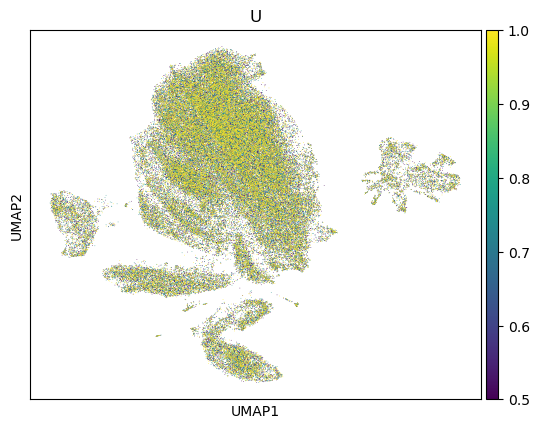

In [30]:
sc.pp.neighbors(adata)  # Compute the neighborhood graph
sc.tl.umap(adata)  # Compute UMAP
sc.pl.umap(adata, color='U')
plt.show()